### Curse of dimensionality

#### In machine learning, a feature of an object can be an attribute or a characteristic that defines it. Each feature represents a dimension and group of dimensions creates a data point. This represents a feature vector that defines the data point to be used by a machine learning algorithm(s).

#### In theory, an increase in the dimensions indicates addition of more information to data thereby improving the quality of data,but practically more dimensions increase noise and redundancy during its analysis. You can form an intuition for the same with the following fact- if we pick 2 points randomly in a unit square, the distance between these 2 points on average be 0.52 . Similarly, average distance between 2 points will be 0.66 if 2 points are chosen randomly in a unit 3D cube. On the similar lines, this average distance becomes 408.25 if we are dealing with 1,000,000-dimensional hypercube. It's a little difficult to believe these numbers given the fact that we are picking these numbers from the same unit hypercube !! But, we shouldn't ignore the fact that there's just plenty of space in higher dimensions. 

#### As a result, high dimensional datasets are at a high risk of being sparse. This also means that any new instance is likely to be very far from any training instance, making predictions much less reliable than in lower dimensions.

In [112]:
%matplotlib notebook
import matplotlib.pyplot as plt
from sklearn import manifold, datasets
import pandas as pd
import numpy as np

### PCA uses projection to reduce dimensionality of data with the goal of choosing the hyperplane that preserves variance the most.

### Let's begin with calculation of eigen values/vectors for a matrix.

In [113]:
# Given an input matrix A
A = np.array([[3, 4], [6, 5], [3, 6]])

In [114]:
# Compute the mean of the columns of input matrix A
M = np.mean(A.T, axis=1)
M

array([4., 5.])

In [115]:
# Center the matrix by subtracting the mean values of each column from each column entry
C = A - M
C

array([[-1., -1.],
       [ 2.,  0.],
       [-1.,  1.]])

In [116]:
# Compute the covariance V of the centered matrix C
V = np.cov(C.T)
V

array([[3., 0.],
       [0., 1.]])

In [117]:
# Perform eigen decompostion of the covariance matrix V
eigen_values, eigen_vectors = np.linalg.eig(V)
print("Eigen Values: ", eigen_values)
print("Eigen Vectors: ", eigen_vectors)

Eigen Values:  [3. 1.]
Eigen Vectors:  [[1. 0.]
 [0. 1.]]


In [118]:
# Projected matrix P
P = eigen_vectors.T.dot(A.T)
P.T

array([[3., 4.],
       [6., 5.],
       [3., 6.]])

In [119]:
# Project the matrix A onto the first principal component
P_with_first_eigen_vector = eigen_vectors[0].T.dot(A.T)
P_with_first_eigen_vector.T

array([3., 6., 3.])

### Data Standardization

In [120]:
from sklearn.preprocessing import StandardScaler

X = np.array([[3, 4], [6, 5], [3, 6]])
X_scaled = StandardScaler().fit_transform(X)
X_scaled

array([[-0.70710678, -1.22474487],
       [ 1.41421356,  0.        ],
       [-0.70710678,  1.22474487]])

In [121]:
features = X_scaled.T
cov_matrix = np.cov(features)
cov_matrix

array([[1.5, 0. ],
       [0. , 1.5]])

In [122]:
eigen_values, eigen_vectors = np.linalg.eig(cov_matrix)
print("Eigen Values: ", eigen_values)
print("Eigen Vectors: ", eigen_vectors)

Eigen Values:  [1.5 1.5]
Eigen Vectors:  [[1. 0.]
 [0. 1.]]


### Visualization

In [123]:
#import corresponding libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [124]:
projected_1 = X_scaled.dot(eigen_vectors.T[0])
projected_2 = X_scaled.dot(eigen_vectors.T[1])
res = pd.DataFrame(projected_1, columns=['PC1'])
res['PC2'] = projected_2
res.head()

,PC1,PC2
0,-0.707107,-1.224745
1,1.414214,0.000000
2,-0.707107,1.224745


<IPython.core.display.Javascript object>


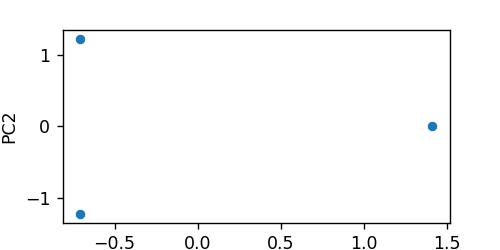

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

In [125]:
plt.figure(figsize=(4, 2))
sns.scatterplot(data = res , x = 'PC1', y = 'PC2', palette= 'icefire')

### PCA for Iris Dataset
#### Let us perform the same steps as above for a slightly complex dataset 
#### Reference: https://towardsdatascience.com/principal-component-analysis-pca-from-scratch-in-python-7f3e2a540c51 

In [126]:
iris_df = pd.read_csv('https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv')
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [127]:
iris_data_df = iris_df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
X = iris_data_df.to_numpy()
y = iris_df['species']
print(X[:5])
print(y[:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object


In [128]:
# All the following steps are same as before
from sklearn.preprocessing import StandardScaler

X_scaled = StandardScaler().fit_transform(X)
features = X_scaled.T
cov_matrix = np.cov(features)
values, vectors = np.linalg.eig(cov_matrix)
explained_variances = []
for i in range(len(values)):
    explained_variances.append(values[i] / np.sum(values))
 
print(np.sum(explained_variances), '\n', explained_variances)

0.9999999999999999 
 [0.7277045209380132, 0.2303052326768065, 0.03683831957627386, 0.005151926808906394]


In [129]:
projected_1 = X_scaled.dot(vectors.T[0])
projected_2 = X_scaled.dot(vectors.T[1])
res = pd.DataFrame(projected_1, columns=['PC1'])
res['PC2'] = projected_2
res['Y'] = y
res.head()

,PC1,PC2,Y
0,-2.264542,-0.505704,setosa
1,-2.086426,0.655405,setosa
2,-2.367950,0.318477,setosa
3,-2.304197,0.575368,setosa
4,-2.388777,-0.674767,setosa


<IPython.core.display.Javascript object>


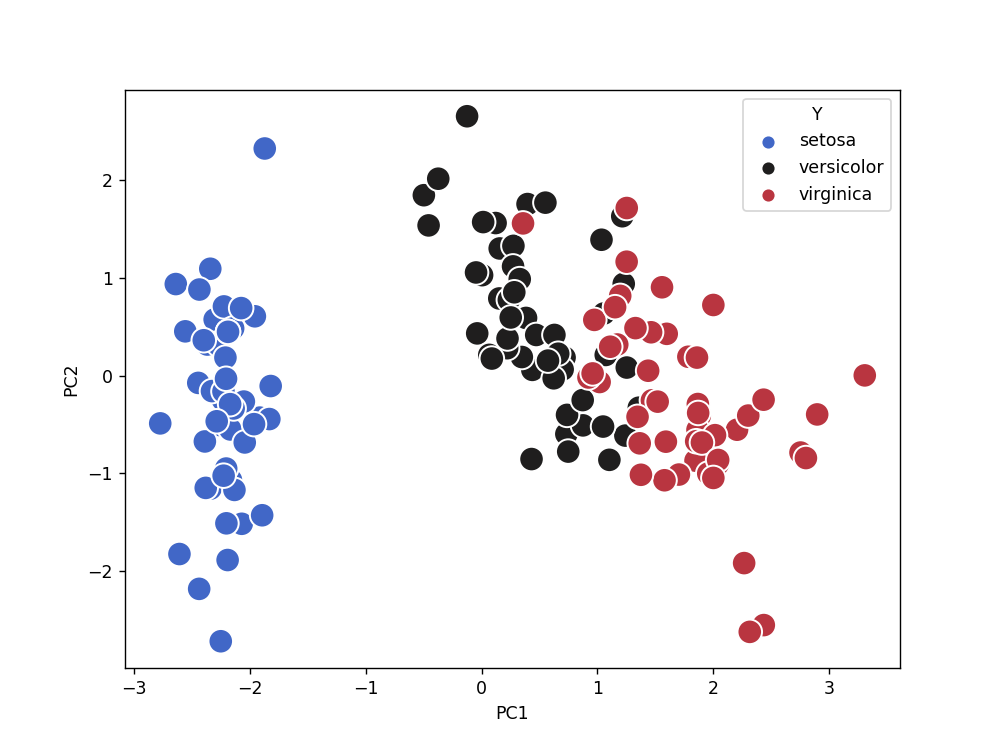

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

In [130]:
plt.figure(figsize=(8,6))
sns.scatterplot(data = res , x = 'PC1',y = 'PC2' , hue = 'Y' , s = 200 , palette= 'icefire')

#We now know how to compute PCA, but why PCA? 
The idea behind PCA is simply to find a low-dimension set of axes that **summarize** data. 
## Why should data be summarized?
Consider this example: We have a dataset composed by a set of properties from cars. These properties describe each car by its size, color, circularity, compactness, radius, number of seats, number of doors, size of trunk and so on. However, many of these features will measure related properties and so will be redundant. Therefore, we should remove these redundancy and describe each car with less properties. This is exactly what PCA aims to do.

For example, think about the number of wheel as a feature of cars and buses, almost every example from both classes have four wheels, hence we can tell that this feature has a low variance (from four up to six wheels or more in some of rare buses), so this feature will make bus and cars look the same, but they are actually pretty different from each other. Now, consider the height as a feature, cars and buses have different values for it, the variance has a great range from the lowest car up to the highest bus. Clearly, the height of these vehicle is a good property to separate them. PCA looks at the variance of each feature because it reasonably assumes that features that present high variance are more likely to have a good split between classes.

Let us go ahead and achieve what we just discussed!

**NOTE:** *Often, people end up making a mistake in thinking that PCA selects some features out of the dataset and discards others. The algorithm actually constructs new set of properties based on combination of the old ones.*

### Principal Component Analysis using sklearn
### Reference: https://machinelearningmastery.com/principal-components-analysis-for-dimensionality-reduction-in-python/ 

Let us first use the *make_classification()* function to create a synthetic binary classification problem with 1,000 examples and 20 input features, 15 inputs of which are meaningful.



In [131]:
#import necessary functions
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

In [132]:
# test classification dataset
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=7)
# summarize the dataset
print(X.shape, y.shape)

(1000, 20) (1000,)


In [133]:
# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=13)

In [134]:
# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

### Choosing right number of dimensions - Instead of arbitrarily choosing the number of dimensions to reduce down to, it's better to choose the number of dimensions that add up to sufficiently large portion of variance (eg- ~95%)

### explained_variance_ratio : this ratio indicates the proportion of the dataset's variance that lies along each principal component.

In [135]:
# performing PCA
pca = PCA(n_components=10)
principalComponents = pca.fit_transform(X_scaled)
print(pca.explained_variance_ratio_)
print(np.sum(pca.explained_variance_ratio_))

[0.16304994 0.14974673 0.10901591 0.09869166 0.08600576 0.0660893
 0.0572263  0.05456994 0.04447539 0.04083015]
0.869701068056919


### Let's try to plot explained variance as a function of number of principal components

<IPython.core.display.Javascript object>


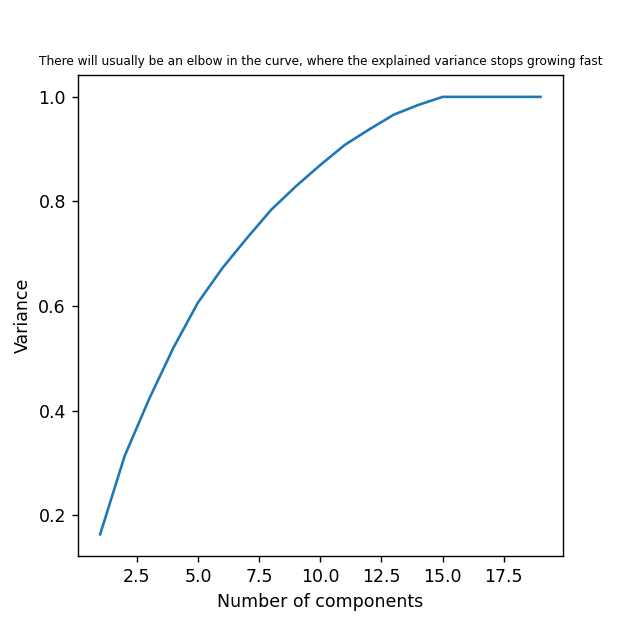

In [136]:
candidate_components=np.arange(1,20,1)
variances=[]
for candidate in candidate_components:
    pca = PCA(n_components=candidate)
    principalComponents = pca.fit_transform(X_scaled)
    variances.append(np.sum(pca.explained_variance_ratio_))
    
plt.figure(figsize = (5, 5))
plt.plot(candidate_components,variances)
plt.xlabel('Number of components')
plt.ylabel('Variance')
plt.title('There will usually be an elbow in the curve, where the explained variance stops growing fast',fontsize=7);

### In the above case, elbow seems to be present somewhere near 12.

In [137]:
pca = PCA(n_components=12)
principalComponents = pca.fit_transform(X_scaled)
print(pca.explained_variance_ratio_)
print(np.sum(pca.explained_variance_ratio_))

[0.16304994 0.14974673 0.10901591 0.09869166 0.08600576 0.0660893
 0.0572263  0.05456994 0.04447539 0.04083015 0.03836937 0.02972756]
0.9377980058090926


In [138]:
lr = LogisticRegression()
lr.fit(principalComponents, y_train)

LogisticRegression()

In [139]:
# perform the same transforms on test data
X_scaled_test = scaler.transform(X_test)
test_principalComponents = pca.transform(X_scaled_test)

### Question: What will happen if you do not perform the above? What is the difference between .fit_transform() and .transform() ?

In [140]:
from sklearn.metrics import accuracy_score
yhat_test = lr.predict(test_principalComponents)
print("Accuracy: ", accuracy_score(y_test, yhat_test))

Accuracy:  0.8233333333333334


### Question: How does changing the PCA *n_components* affect the above accuracy?

#### Principal Component Analysis on the vehicles dataset
#### Download dataset from: https://github.com/Meigarom/machine_learning/tree/master/dataset 
#### Let us improve classification outcome of a real dataset!


In [141]:
df = pd.read_csv("vehicle.csv")

In [142]:
df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,van
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,van
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,saab
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,van
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,bus


In [143]:
df.describe()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
count,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.00000,846.000000,846.000000,846.000000,846.000000,846.000000
mean,93.678487,44.861702,82.088652,168.940898,61.693853,8.567376,168.839243,40.933806,20.582742,147.998818,188.625296,439.911348,174.70331,72.462175,6.377069,12.599291,188.932624,195.632388
std,8.234474,6.169866,15.771533,33.472183,7.888251,4.601217,33.244978,7.811560,2.592138,14.515652,31.394837,176.692614,32.54649,7.486974,4.918353,8.931240,6.163949,7.438797
min,73.000000,33.000000,40.000000,104.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.00000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,87.000000,40.000000,70.000000,141.000000,57.000000,7.000000,146.250000,33.000000,19.000000,137.000000,167.000000,318.250000,149.00000,67.000000,2.000000,5.000000,184.000000,190.250000
50%,93.000000,44.000000,80.000000,167.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,178.500000,364.000000,173.00000,71.500000,6.000000,11.000000,188.000000,197.000000
75%,100.000000,49.000000,98.000000,195.000000,65.000000,10.000000,198.000000,46.000000,23.000000,159.000000,217.000000,587.000000,198.00000,75.000000,9.000000,19.000000,193.000000,201.000000
max,119.000000,59.000000,112.000000,333.000000,138.000000,55.000000,265.000000,61.000000,29.000000,188.000000,320.000000,1018.000000,268.00000,135.000000,22.000000,41.000000,206.000000,211.000000


In [144]:
df.isna().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

Seems like we are good to go!

In [145]:
# Check how many classes are present in the dataset
df['class'].value_counts()

bus     218
saab    217
opel    212
van     199
Name: class, dtype: int64

### Let us make a binary classification dataset for ease of use!

In [146]:
binary_class1_df =  df.loc[df['class'] == 'bus']
binary_class1_df.describe()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
count,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000
mean,91.591743,45.068807,76.720183,166.004587,63.431193,7.013761,170.022936,40.114679,20.573394,146.701835,192.889908,448.894495,180.949541,77.123853,4.844037,10.211009,187.811927,191.325688
std,8.618024,5.030766,12.092564,30.574152,8.802877,4.757220,33.356812,6.501376,2.728351,10.492398,33.996568,193.138314,31.247374,7.684941,3.220540,6.872872,7.321230,7.918326
min,78.000000,35.000000,59.000000,113.000000,47.000000,4.000000,141.000000,26.000000,18.000000,124.000000,163.000000,299.000000,117.000000,65.000000,0.000000,0.000000,178.000000,181.000000
25%,85.000000,42.000000,68.250000,139.250000,56.000000,6.000000,149.000000,36.000000,19.000000,142.000000,170.000000,327.000000,163.250000,71.000000,2.000000,5.000000,181.000000,184.000000
50%,89.000000,44.000000,72.000000,168.500000,64.000000,6.000000,152.000000,44.000000,19.000000,145.000000,177.000000,344.000000,176.000000,76.000000,5.000000,10.000000,186.000000,189.000000
75%,98.000000,47.000000,80.750000,188.000000,69.000000,7.000000,177.750000,45.000000,21.000000,149.750000,203.750000,486.500000,190.750000,82.000000,7.000000,14.000000,195.000000,198.750000
max,114.000000,58.000000,109.000000,252.000000,126.000000,52.000000,265.000000,47.000000,29.000000,175.000000,288.000000,1018.000000,268.000000,127.000000,17.000000,31.000000,202.000000,209.000000


In [147]:
binary_class2_df =  df.loc[df['class'] == 'saab']
binary_class2_df.describe()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
count,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000
mean,97.281106,45.534562,88.672811,180.801843,61.142857,8.792627,179.668203,38.317972,21.447005,148.691244,197.152074,493.797235,179.456221,69.755760,7.658986,15.299539,189.714286,198.041475
std,9.081384,6.819088,17.005142,30.804828,4.321871,2.151300,31.523809,7.486735,2.452928,16.134606,27.920023,163.156240,33.776076,5.291527,5.816947,10.066798,4.991792,6.610397
min,78.000000,33.000000,40.000000,104.000000,51.000000,3.000000,112.000000,30.000000,17.000000,118.000000,130.000000,184.000000,115.000000,59.000000,0.000000,0.000000,179.000000,182.000000
25%,90.000000,39.000000,77.000000,161.000000,58.000000,7.000000,152.000000,32.000000,19.000000,133.000000,174.000000,349.000000,149.000000,66.000000,3.000000,7.000000,187.000000,195.000000
50%,97.000000,46.000000,93.000000,188.000000,61.000000,9.000000,183.000000,36.000000,22.000000,150.000000,202.000000,505.000000,179.000000,70.000000,7.000000,14.000000,189.000000,199.000000
75%,105.000000,52.000000,104.000000,203.000000,64.000000,11.000000,211.000000,43.000000,24.000000,163.000000,223.000000,659.000000,213.000000,72.000000,12.000000,22.000000,192.000000,202.000000
max,119.000000,56.000000,112.000000,234.000000,73.000000,12.000000,222.000000,61.000000,25.000000,177.000000,235.000000,721.000000,240.000000,86.000000,22.000000,41.000000,203.000000,211.000000


In [148]:
new_df = pd.concat([binary_class1_df, binary_class2_df], ignore_index=True)

In [149]:
new_df.describe()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
count,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000
mean,94.429885,45.301149,82.682759,173.386207,62.289655,7.901149,174.834483,39.218391,21.009195,147.694253,195.016092,471.294253,180.204598,73.448276,6.248276,12.749425,188.760920,194.675862
std,9.289334,5.987612,15.900774,31.536283,7.025218,3.796296,32.775528,7.059695,2.628260,13.623504,31.151292,180.014082,32.504477,7.554348,4.900199,8.974578,6.333136,8.024917
min,78.000000,33.000000,40.000000,104.000000,47.000000,3.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,115.000000,59.000000,0.000000,0.000000,178.000000,181.000000
25%,86.000000,41.000000,70.000000,148.500000,57.000000,6.000000,150.000000,32.000000,19.000000,138.000000,171.000000,330.000000,156.500000,68.000000,2.000000,6.000000,183.000000,187.000000
50%,93.000000,45.000000,77.000000,178.000000,62.000000,7.000000,162.000000,40.000000,20.000000,146.000000,185.000000,399.000000,177.000000,72.000000,5.000000,11.000000,189.000000,196.000000
75%,102.000000,51.000000,100.000000,199.000000,66.000000,9.000000,203.500000,45.000000,23.000000,159.000000,220.000000,624.000000,202.000000,78.500000,9.000000,19.000000,193.000000,201.000000
max,119.000000,58.000000,112.000000,252.000000,126.000000,52.000000,265.000000,61.000000,29.000000,177.000000,288.000000,1018.000000,268.000000,127.000000,22.000000,41.000000,203.000000,211.000000


In [150]:
new_df['class'].value_counts()

bus     218
saab    217
Name: class, dtype: int64

In [151]:
# Encoding bus as 0 and saab as 1
new_df['class'].replace('bus', 0, inplace=True)
new_df['class'].replace('saab', 1, inplace=True)

In [152]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True, random_state=13)

In [153]:
X_train.shape

(800, 20)

In [154]:
# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

In [155]:
# performing PCA
pca = PCA(n_components=10)
principalComponents = pca.fit_transform(X_scaled)
print(pca.explained_variance_ratio_)

[0.16750341 0.1505305  0.10637706 0.09805535 0.08735434 0.06530053
 0.0568136  0.05300465 0.04473913 0.04026384]


In [156]:
# Train one LR with PCA
lr1 = LogisticRegression()
lr1.fit(principalComponents, y_train)

#Train one LR without PCA (for comparison)
lr2 = LogisticRegression()
lr2.fit(X_scaled, y_train)

LogisticRegression()

In [157]:
# perform the same transforms on test data
X_scaled_test = scaler.transform(X_test)
test_principalComponents = pca.transform(X_scaled_test)

In [158]:
yhat_test_pca = lr1.predict(test_principalComponents)
yhat_test = lr2.predict(X_scaled_test)
print("Accuracy with PCA: ", accuracy_score(y_test, yhat_test_pca))
print("Accuracy without PCA: ", accuracy_score(y_test, yhat_test))

Accuracy with PCA:  0.8
Accuracy without PCA:  0.855


Notice that out of 18 dimensions (columns), 15 dimensions can get an accuraccy as good as using the initial columns.

### Is projection an only method for dimensionality reduction? Let's consider this case of swiss roll dataset

In [159]:
sr_points, sr_color = datasets.make_swiss_roll(n_samples=1500, random_state=0)

<IPython.core.display.Javascript object>


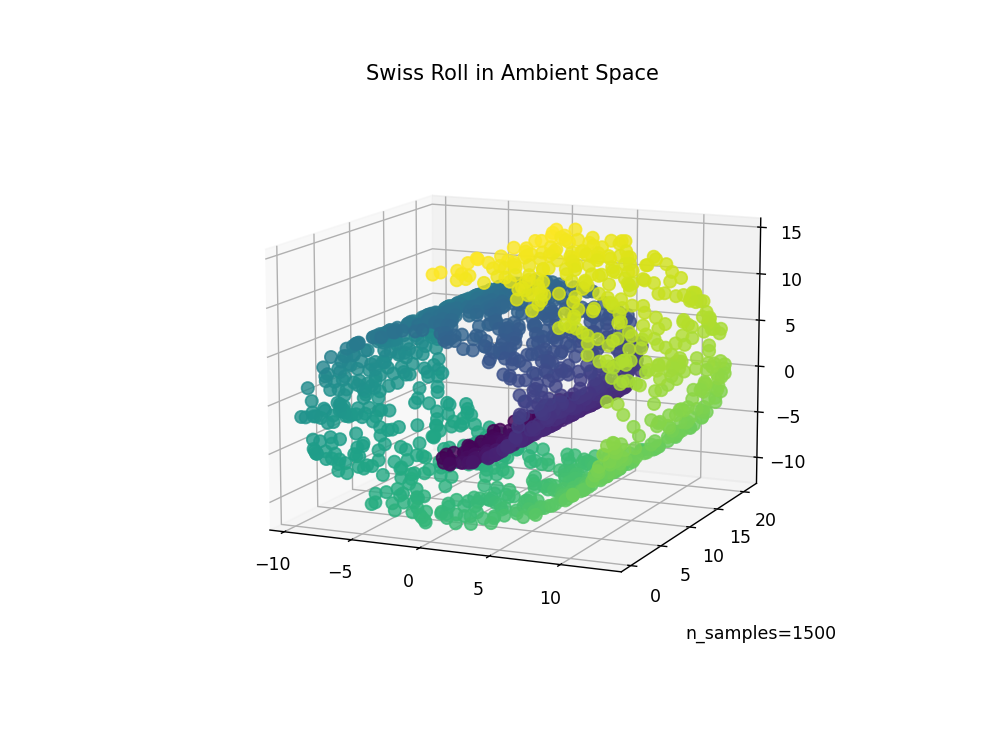

In [160]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")
fig.add_axes(ax)
ax.scatter(
    sr_points[:, 0], sr_points[:, 1], sr_points[:, 2], c=sr_color, s=50, alpha=0.8
)
ax.set_title("Swiss Roll in Ambient Space")
ax.view_init(azim=-66, elev=12)
_ = ax.text2D(0.8, 0.05, s="n_samples=1500", transform=ax.transAxes)

### Can we transform the data in a way such that classification of points in different colors becomes easier? Surely projection won't work.
### (Hint: What if this swiss roll can be unrolled in 2D space !? One can easily see the decision boundaries in the unrolled version)

### Let's see another complex distribution.

In [169]:
vertical_swiss_data=pd.read_csv('vertical_swiss_roll_dataset.txt',sep='\s+',header=None).to_numpy()
vertical_swiss_color =[0]*1600

In [170]:
for i in np.argwhere(vertical_swiss_data[:,2]>0):
    vertical_swiss_color[i[0]]=1

for i in np.argwhere(vertical_swiss_data[:,2]<=0):
    vertical_swiss_color[i[0]]=2



<IPython.core.display.Javascript object>


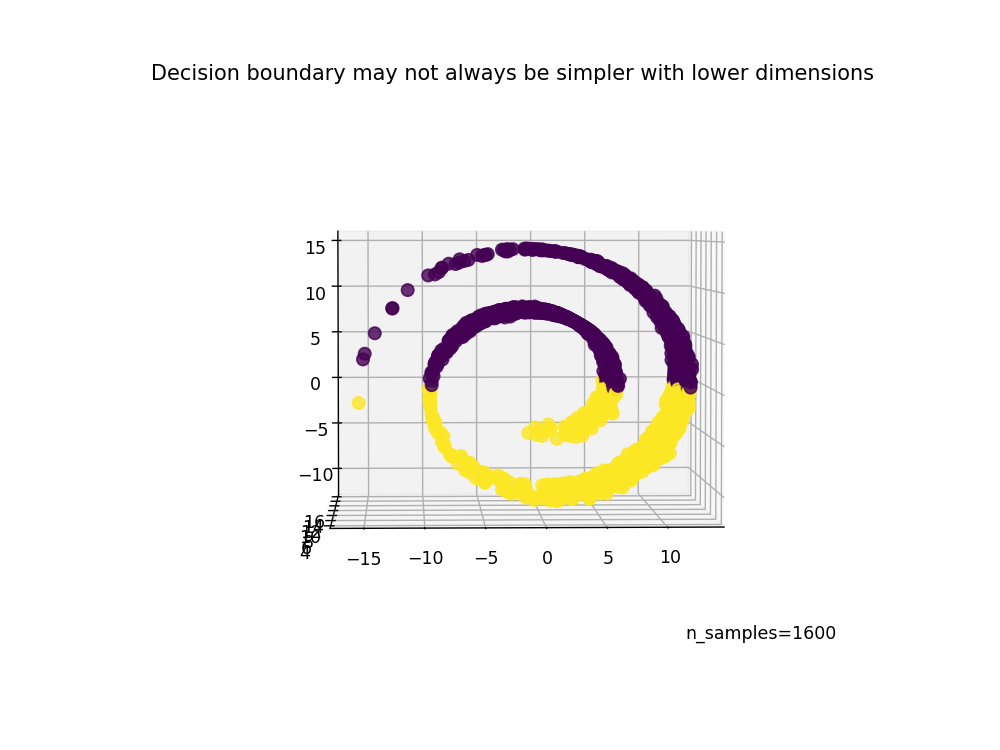

In [171]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")
fig.add_axes(ax)
ax.scatter(
    vertical_swiss_data[:, 0], vertical_swiss_data[:, 1], vertical_swiss_data[:, 2], c=vertical_swiss_color, s=50, alpha=0.8
)
ax.set_title("Decision boundary may not always be simpler with lower dimensions")
ax.view_init(azim=-66, elev=12)
_ = ax.text2D(0.8, 0.05, s="n_samples=1600", transform=ax.transAxes)